## Decision Trees

For this, we are going to use the famous Kaggle Titanic dataset where we will predict the survival of a passenger on the ill-fated Titanic.

In [39]:
import numpy as np
import pandas as pd
from sklearn import tree
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydot
from sklearn.ensemble import RandomForestClassifier

#### Importing the data

In [26]:
train = pd.read_csv('train.csv')

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [28]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


We are going to drop passengerId, name, ticket, embarked and cabin

In [29]:
train = train.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Embarked', 'Cabin', 'Age'], axis = 0)

We will convert Sex into numerical data.

In [30]:
train['Sex'] = train['Sex'].map({'male': 1, 'female': 0})

In [32]:
train.sample(5)

,Survived,Pclass,Sex,SibSp,Parch,Fare
15,1,2,0,0,0,16.0000
21,1,2,1,0,0,13.0000
139,0,1,1,0,0,79.2000
364,0,3,1,1,0,15.5000
258,1,1,0,0,0,512.3292


#### Preparing the decision tree

In [33]:
features = list(train.columns[1:7])
features

['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare']

In [34]:
y = train['Survived']
X = train[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

We have generated our tree. Let's visualise it

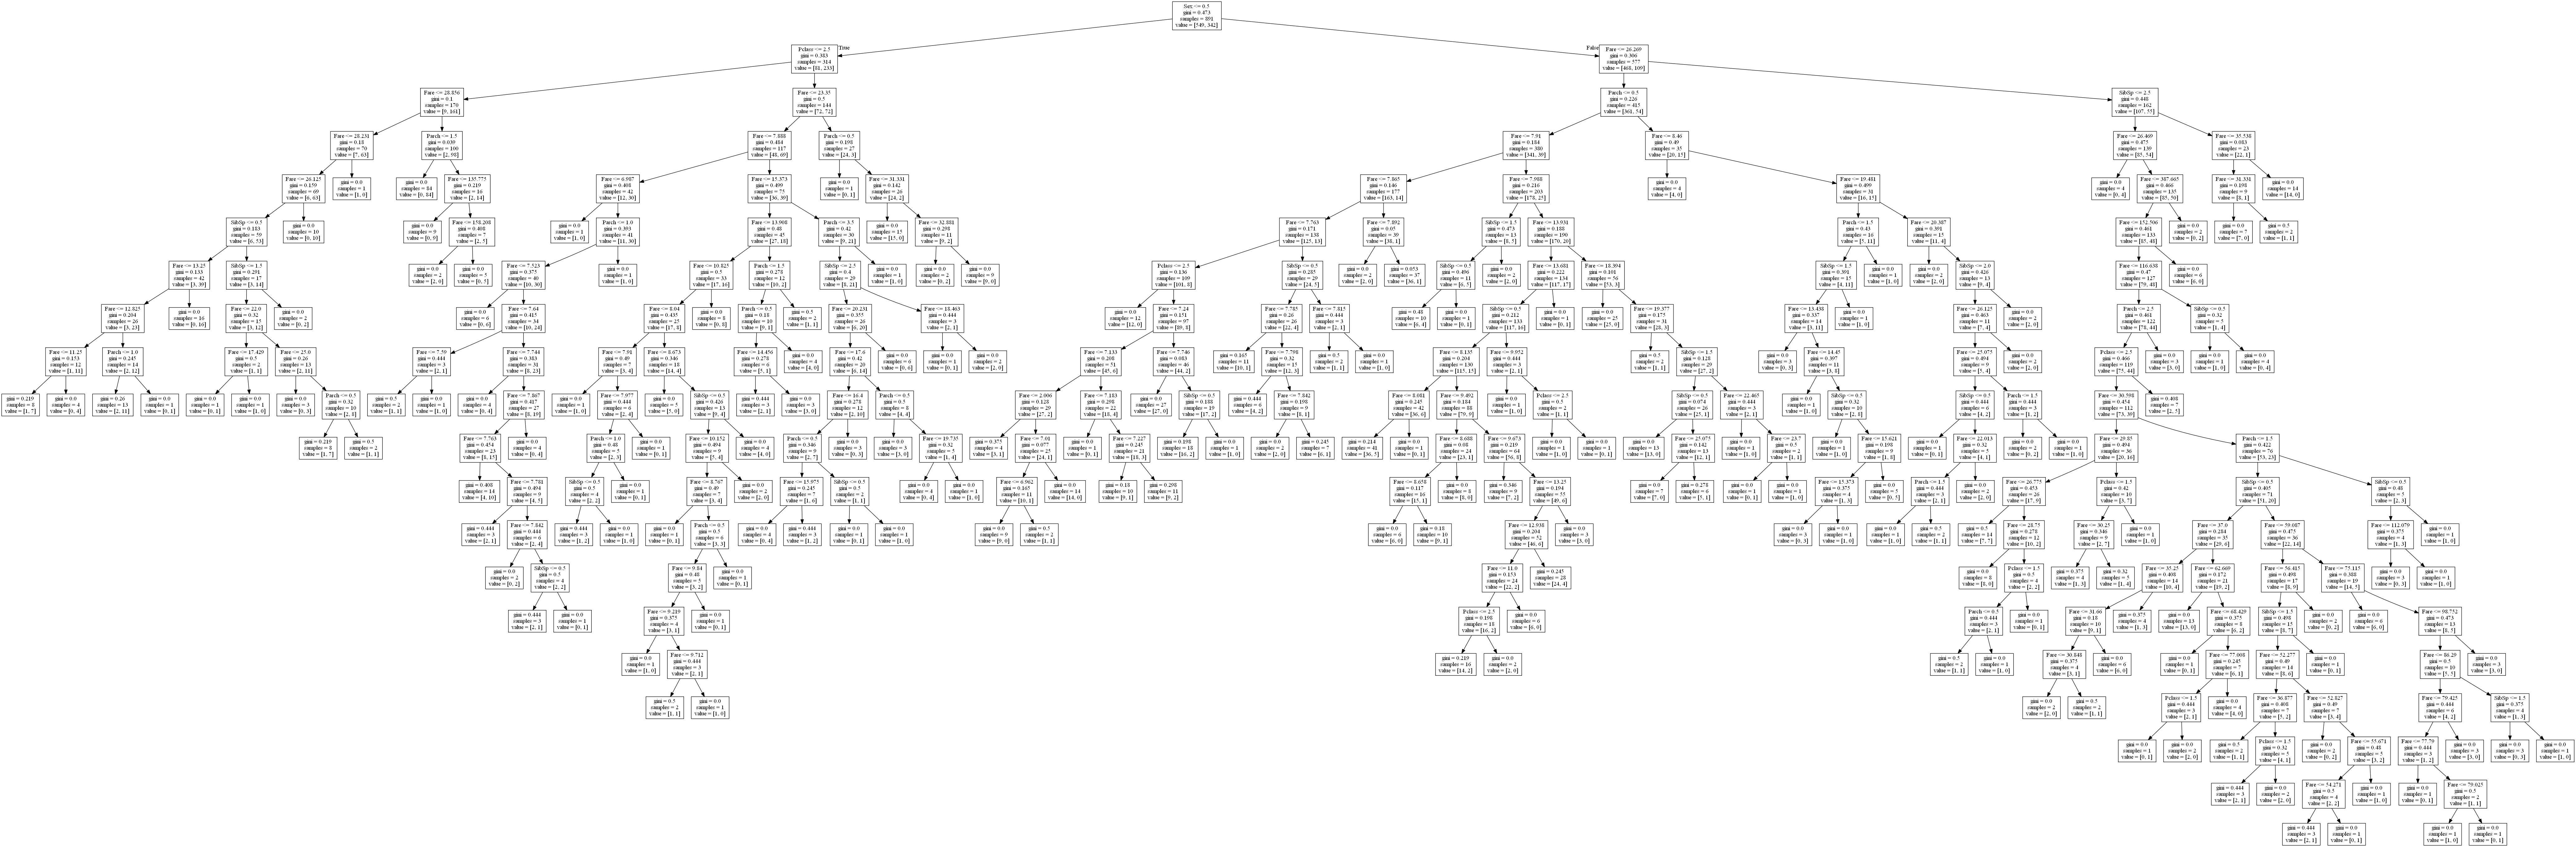

In [38]:
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data, feature_names=features)  
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

We will use a Random Forest with 10 trees to predict survival of a person.

In [40]:
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)

#### Testing our model

In [52]:
clf.predict([[1, 1, 0, 0, 75.2417]])

array([1], dtype=int64)

In [53]:
clf.predict([[3, 1, 0, 0, 7.7500]])

array([0], dtype=int64)

Hence, we have succesfully made a decision tree.